# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.203232e+01     8.349448e+00
 * time: 0.001964092254638672
     1     3.094202e+01     4.325020e+00
 * time: 0.00793910026550293
     2     2.158374e+01     3.962371e+00
 * time: 0.014549970626831055
     3     1.709539e+01     4.545882e+00
 * time: 0.018670082092285156
     4     1.196102e+01     2.429576e+00
 * time: 0.022912025451660156
     5     9.922816e+00     9.393009e-01
 * time: 0.02696394920349121
     6     9.340312e+00     1.289821e+00
 * time: 0.030425071716308594
     7     8.976860e+00     7.196270e-01
 * time: 0.03393697738647461
     8     8.692520e+00     7.090164e-01
 * time: 0.03780102729797363
     9     8.468743e+00     6.926971e-01
 * time: 0.04228997230529785
    10     8.331664e+00     4.941189e-01
 * time: 0.04667401313781738
    11     8.220236e+00     4.523907e-01
 * time: 0.051299095153808594
    12     8.081701e+00     4.879086e-01
 * time: 0.10031509399414062
    13     8.058183e+00     8.125837e-01
 *

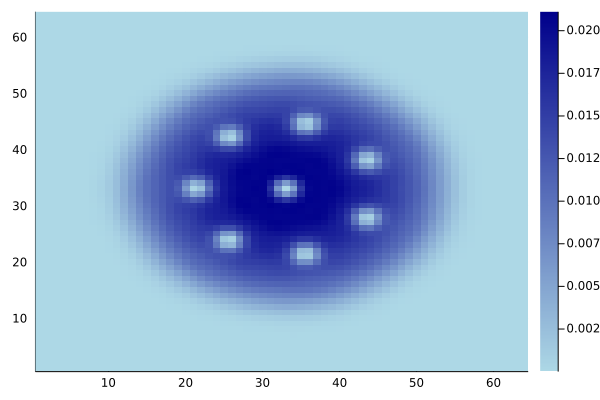

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)